<a href="https://colab.research.google.com/github/FilledEther20/Metaheuristic_Algo/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Particle:
  def __init__(self,bounds):
    self.position=np.array([np.random.uniform(x,y) for x,y in bounds])
    self.velocity=np.array([0.0 for _ in bounds])
    self.best_position=self.position.copy()
    self.best_score=float('inf') #because in pso we try to optimize by global minima

  def update_velocity(self,global_best_position,inertia_weight,coginitive_weight,social_weight):
      inertia_cont=inertia_weight*self.velocity
      coginitive_cont=coginitive_weight*np.random.random()*(self.best_position-self.position)
      social_cont=social_weight*np.random.random()*(global_best_position-self.position)
      self.velocity=inertia_cont+coginitive_cont+social_cont

  def update_position(self,bounds):
    #current position
    self.position=self.position+self.velocity
    for i in range(len(self.position)):
      if self.position[i]<bounds[i][0]:
        self.position[i]=bounds[i][0]
      elif self.position[i]>bounds[i][1]:
        self.position[i]=bounds[i][1]


###PSO Function

In [ ]:
def pso(objective_function,bounds,num_particles,max_iterations,inertia_weight=0.5,coginitive_weight=1.6,social_weight=1.6):
  particles=[Particle(bounds) for _ in range(num_particles)]
  global_best_position=np.array([np.random.uniform(low,high) for low,high in bounds])
  global_best_score=float('inf')

  for iteration in range(max_iterations):
    ##Initialization
    for particle in particles:
      score=objective_function(particle.position[0],particle.position[1])
      if score<particle.best_score:
        particle.best_score=score
        particle.best_position=particle.position.copy()
      elif score<global_best_score:
        global_best_score=score
        global_best_position=particle.position.copy()

    ##Update velocity and position
    for particle in particles:
      particle.update_velocity(global_best_position,inertia_weight,coginitive_weight,social_weight)
      particle.update_position(bounds)


    print(f"Iteration {iteration+1}/{max_iterations},Best Score:{global_best_score,global_best_position}")

  return global_best_position,global_best_score

####ROSENBROCK FUNCTION(objective function)



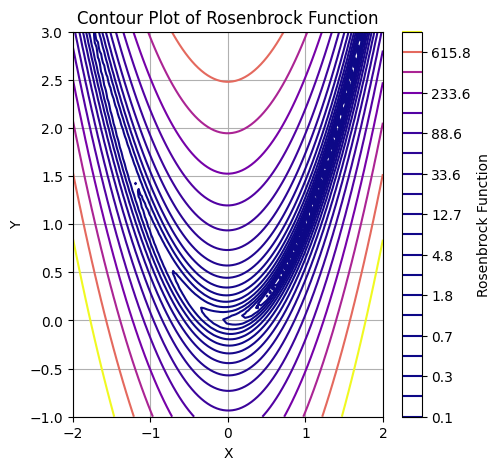

In [ ]:
def rosenbrock_function(x,y):
  return (1-x)**2+100*(y-x**2)**2

x=np.linspace(-2,2,100)
y=np.linspace(-1,3,100)

X,Y=np.meshgrid(x,y)
Z=rosenbrock_function(X,Y)

plt.figure(figsize=(5,5))
plt.contour(X,Y,Z,levels=np.logspace(-1,3,20),cmap='plasma')
plt.colorbar(label='Rosenbrock Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Rosenbrock Function')
plt.grid(True)
plt.show()

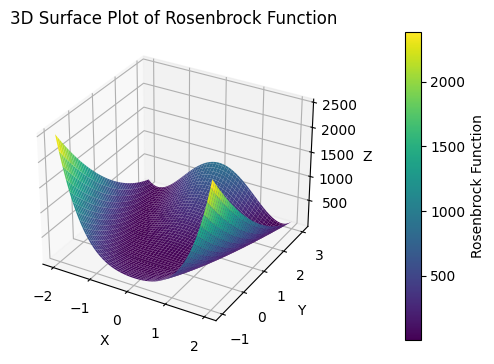

In [ ]:

# Generate x and y points for plotting
x = np.linspace(-2, 2, 100)  # Adjust the range as needed
y = np.linspace(-1, 3, 100)  # Adjust the range as needed

# Create a meshgrid of (x, y) points
X, Y = np.meshgrid(x, y)

# Compute the Rosenbrock function for each point in the meshgrid
Z = rosenbrock_function(X, Y)

# Plot the Rosenbrock function as a 3D surface plot
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Rosenbrock Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot of Rosenbrock Function')
plt.show()

In [ ]:
bounds=[(-5.0,5.0) for _ in range(2)]
best_position,best_score=pso(rosenbrock_function,bounds,num_particles=30,max_iterations=100)
print(f"Best Position:{best_position},Best Score:{best_score}")

Iteration 1/100,Best Score:(inf, array([4.03407477, 3.21823487]))
Iteration 2/100,Best Score:(225.43295333527968, array([ 0.90828323, -0.67643605]))
Iteration 3/100,Best Score:(28.08311376314514, array([ 0.16771936, -0.49522882]))
Iteration 4/100,Best Score:(28.08311376314514, array([ 0.16771936, -0.49522882]))
Iteration 5/100,Best Score:(28.08311376314514, array([ 0.16771936, -0.49522882]))
Iteration 6/100,Best Score:(28.08311376314514, array([ 0.16771936, -0.49522882]))
Iteration 7/100,Best Score:(1.461758589493891, array([ 0.0004957 , -0.06802547]))
Iteration 8/100,Best Score:(1.147956797067888, array([ 0.03225909, -0.04494134]))
Iteration 9/100,Best Score:(1.147956797067888, array([ 0.03225909, -0.04494134]))
Iteration 10/100,Best Score:(0.8137711579042783, array([0.09978811, 0.00413555]))
Iteration 11/100,Best Score:(0.6436287319871828, array([0.27419951, 0.10936759]))
Iteration 12/100,Best Score:(0.5782930916457601, array([0.28646421, 0.10835999]))
Iteration 13/100,Best Score:(0.